### Setup

In [2]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 

# load and clean datasets
df =sns.load_dataset('penguins')
df = df.dropna(how='any')
#df.info()
#sns.pairplot(df, plot_kws = {'color': 'blue'})

In [3]:
# establish style in sns
sns.set(rc={'figure.figsize': (12,8)})
sns.set_style('darkgrid')

### Exploratory Data Analysis

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [6]:
print(df.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


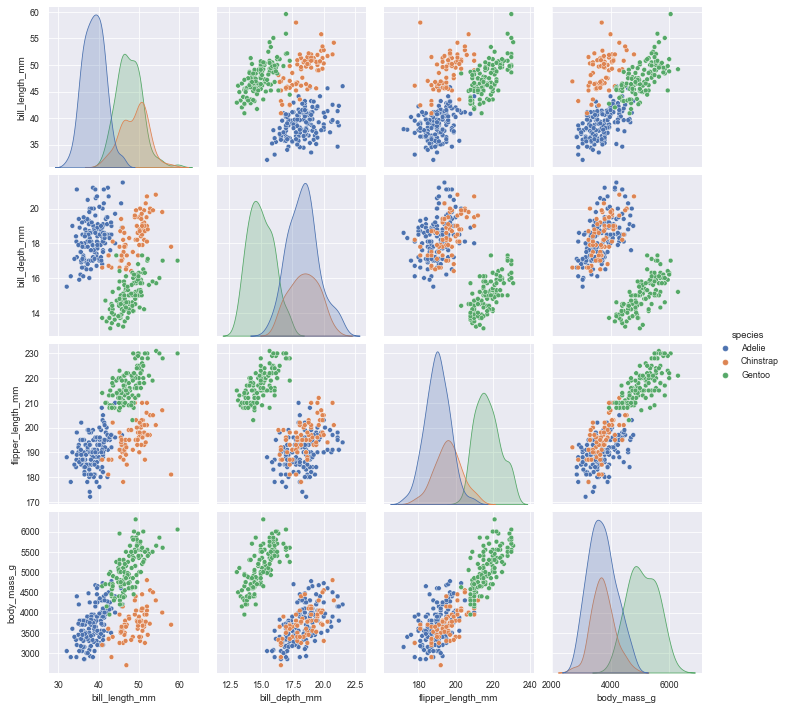

In [52]:
# create a pairplot to see correlations between features
sns.set_context('paper')
pairplot_figure = sns.pairplot(df, hue='species')

#### The pair plot above confirms my previous finding that Gentoo penguins are big birds with long flippers and shallow bills. 
#### One can differentiate Chinstrap and Adelie penguins based on the appearance of a chinstrap or Adelie's shorter bills.
#### Let's take our analysis in a new direction: What are the islands in the dataset and what penguin species live on each island?

In [8]:
# what are the islands in this data?
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
# what species of penguin lives on Torgerson island?
torgerson = df[df['island'] == 'Torgersen']
torgerson ['species'].unique()

array(['Adelie'], dtype=object)

In [63]:
# what species of penguin lives on Biscoe island?
biscoe = df[df['island'] == 'Biscoe']
biscoe ['species'].unique()

array(['Adelie', 'Gentoo'], dtype=object)

In [11]:
# what species of penguin lives on Dream island?
dream = df[df['island'] == 'Dream']
dream ['species'].unique()

array(['Adelie', 'Chinstrap'], dtype=object)

#### It appears that Adelie penguins exist on all 3 islands. 
#### **Are there any differences among them based on their locations?**

In [12]:
# create new data frame of just Adelie penguins
adelie = df[df['species'] == 'Adelie']
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


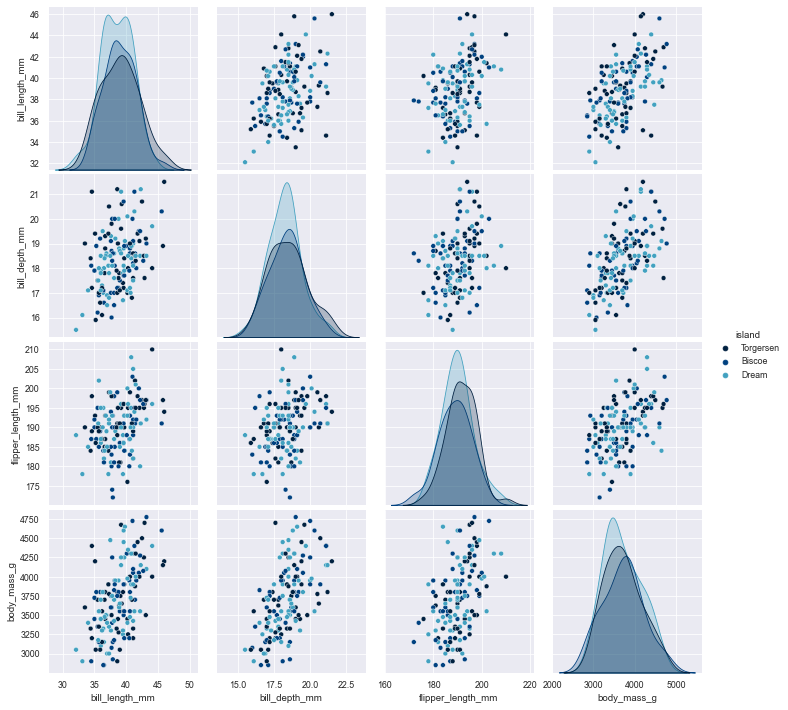

In [51]:
# create a pairplot to see correlations between features of Adelies across islands
sns.set_context('paper')
pairplot_figure = sns.pairplot(adelie, hue='island', palette='ocean')

#### It seems there are a lot of similarities among the Adelies, even if they live on different islands.

#### Let's examine these birds through a pivot table instead.

In [14]:
# create pivot table: average of various features of Adelies by island
pivot = adelie.pivot_table(index =['island'], 
                           values ={'body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm'},
                           aggfunc ='mean')
print (pivot)

           bill_depth_mm  bill_length_mm  body_mass_g  flipper_length_mm
island                                                                  
Biscoe         18.370455       38.975000  3709.659091         188.795455
Dream          18.240000       38.520000  3701.363636         189.927273
Torgersen      18.451064       39.038298  3708.510638         191.531915


#### Based on the pivot table above, although the average features of Adelies across the three islands are similar, the biggest differences are body mass and flipper length:
* Biscoe's Adelies on average weigh more than Dream's and Torgerson's.
* Torgerson's Adelies on average have longer flippers than Biscoe's and Dream's.

#### Are the same findings exemplified in the following box and swarm plots?

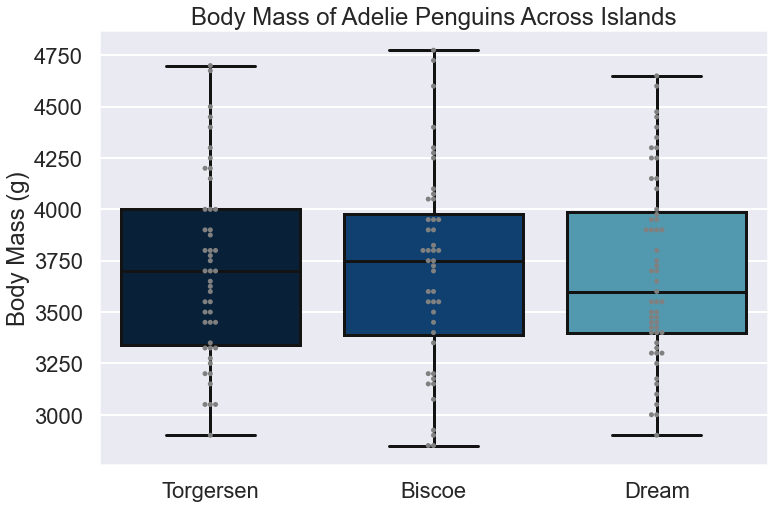

In [59]:
# establish poster context
sns.set_context('poster')

# box and swarm plot combination for body mass of Adelies across islands
ax = sns.boxplot(x = 'island', y = 'body_mass_g', data = adelie, palette = 'ocean')
ax = sns.swarmplot(x = 'island', y = 'body_mass_g', data = adelie, color = 'gray')
plt.title("Body Mass of Adelie Penguins Across Islands")
plt.ylabel('Body Mass (g)')
plt.xlabel(None)
ax;

#### Even though the pivot table suggests that Biscoe's Adelies on average have greater body mass than other Adelies, the interquartile range (middle 50%) of Adelies in all three islands is comparable.

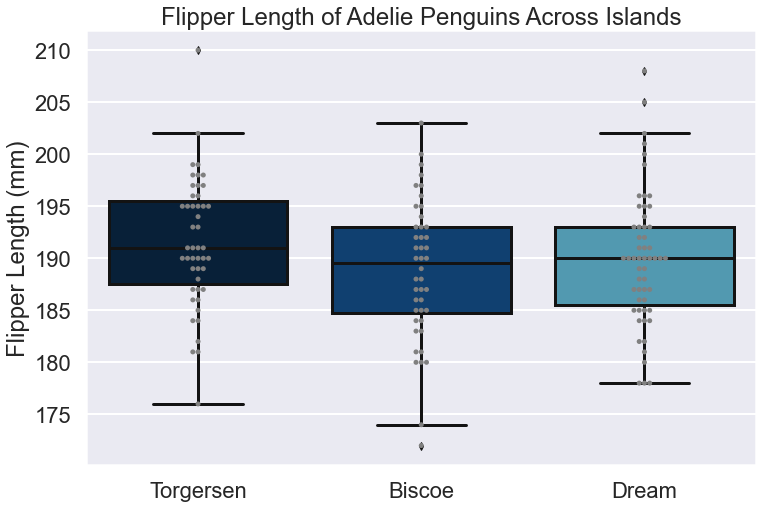

In [56]:
# box and swarm plot combination for flipper length of Adelies across islands
ax = sns.boxplot(x = 'island', y = 'flipper_length_mm', data = adelie, palette='ocean')
ax = sns.swarmplot(x = 'island', y = 'flipper_length_mm', data = adelie, color = 'gray')
plt.title("Flipper Length of Adelie Penguins Across Islands")
plt.ylabel('Flipper Length (mm)')
plt.xlabel(None)
ax;

#### If we remember the pivot table, Togerson's Adelies on average have longer flippers than other Adelies. The visualization above confirms it. It's also interesting to  note that the interquartile range of Torgerson's Adelies is somewhat higher than that of other island's.

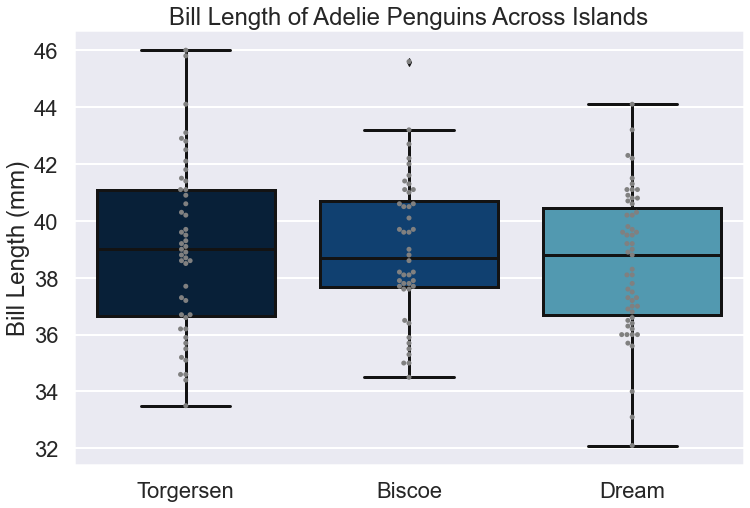

In [57]:
# box and swarm plot combination for bill length of Adelies across islands
ax = sns.boxplot(x = 'island', y = 'bill_length_mm', data = adelie, palette='ocean')
ax = sns.swarmplot(x = 'island', y = 'bill_length_mm', data = adelie, color = 'gray')
plt.title("Bill Length of Adelie Penguins Across Islands")
plt.ylabel('Bill Length (mm)')
plt.xlabel(None)
ax;

#### Average Adelie bill lengths are similar across all islands, but Torgersen's Adelies have the greatest variation in bill lengths, whereas Biscoe's Adelies have the smallest variation in bill lengths. 

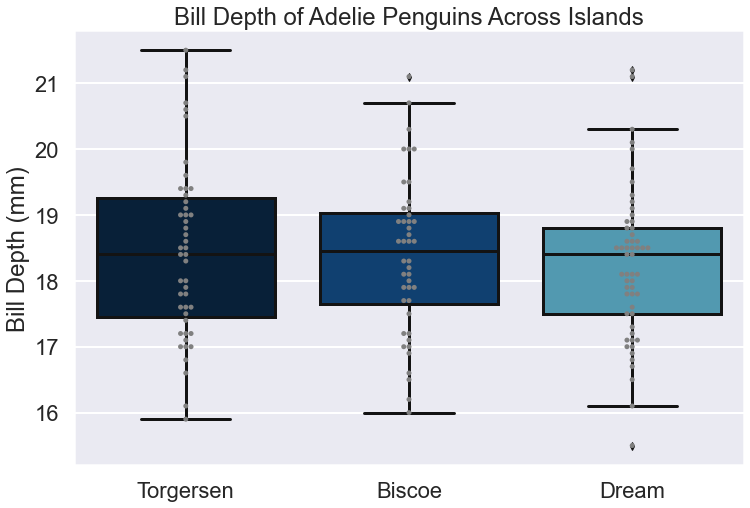

In [58]:
# box and swarm plot combination for bill depth of Adelies across islands
ax = sns.boxplot(x = 'island', y = 'bill_depth_mm', data = adelie, palette = 'ocean')
ax = sns.swarmplot(x = 'island', y = 'bill_depth_mm', data = adelie, color = 'gray')
plt.title("Bill Depth of Adelie Penguins Across Islands")
plt.ylabel('Bill Depth (mm)')
plt.xlabel(None)
ax;

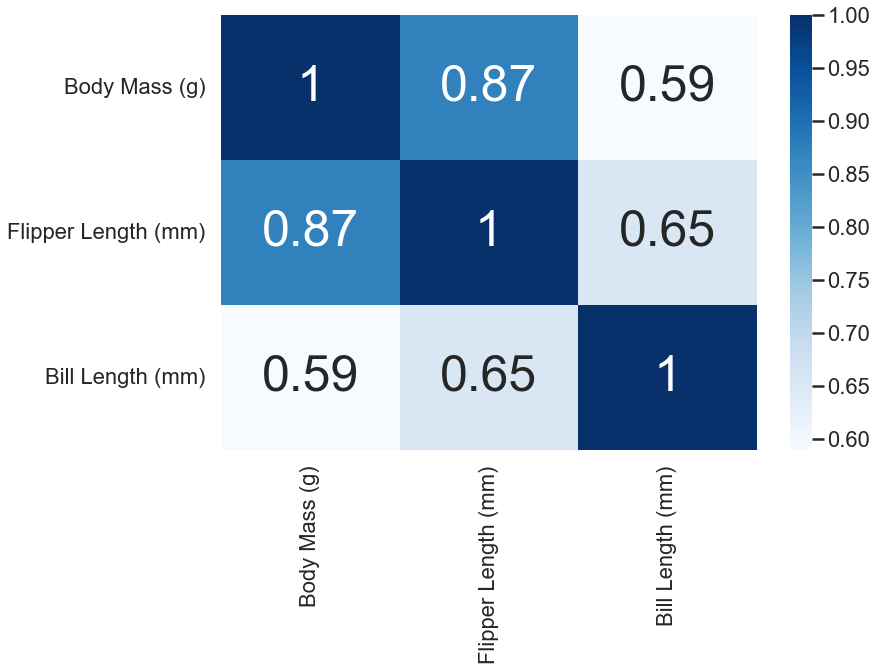

In [33]:
# create correlation dataframe
corr_dataframe = df[['body_mass_g','flipper_length_mm','bill_length_mm']].corr()

# establish tick labels for heatmap below
col=['Body Mass (g)', 'Flipper Length (mm)', 'Bill Length (mm)']

# create heatmap
hm = sns.heatmap(corr_dataframe, annot = True, annot_kws = {'size':'50'}, cmap='Blues', xticklabels = col, yticklabels = col)

<figure><img src="images\adelie.jpg" width=400 height=150 /><figcaption><b>Adelie penguin</b></figcaption></figure><figure><img src="images\chinstrap.jpg" width=400 height=150/><figcaption><b>Chinstrap penguin</b></figcaption></figure><figure><img src="images\gentoo.jpg" width=400 height=150/><figcaption><b>Gentoo penguin</b></figcaption></figure>

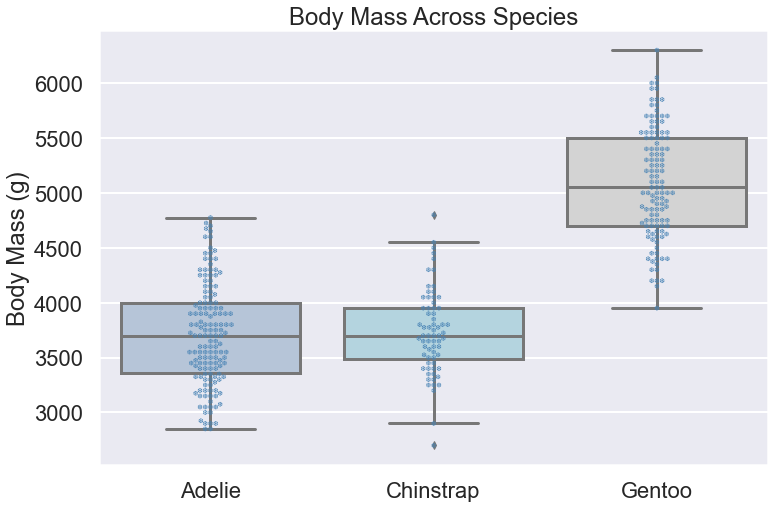

In [34]:
# box and swarm plot combination for body mass across species
ax = sns.boxplot(x = 'species', y = 'body_mass_g', data = df, palette = ['lightsteelblue', 'lightblue', 'lightgray'])
ax = sns.swarmplot(x = 'species', y = 'body_mass_g', data = df, color = 'steelblue', marker='$❆$')
plt.title("Body Mass Across Species")
plt.ylabel('Body Mass (g)')
plt.xlabel(None)
ax;

### Gentoo penguins have the greatest body mass. Adelie and chinstrap penguins have similar body masses, but Adelie penguins have greater variation in body mass than chinstrap penguins.

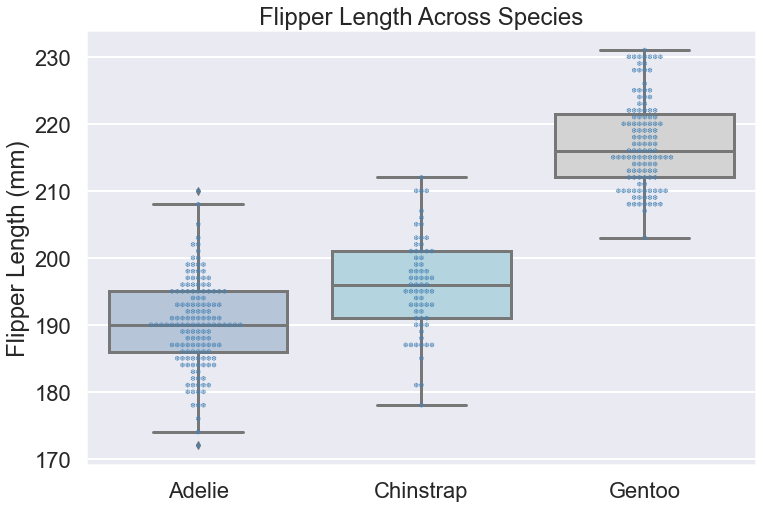

In [35]:
# box and swarm plot combination for flipper length across species
ax = sns.boxplot(x = 'species', y = 'flipper_length_mm', data = df, palette = ['lightsteelblue', 'lightblue', 'lightgray'])
ax = sns.swarmplot(x = 'species', y = 'flipper_length_mm', data = df, color = 'steelblue', marker='$❆$')
plt.title("Flipper Length Across Species")
plt.ylabel('Flipper Length (mm)')
plt.xlabel(None)
ax;

### Due to the 87% correlation between body mass and flipper length, it is unsurprising that Gentoo penguins have the longest flippers. 
### It is interesting to note that even though Adelie and chinstrap penguins have similar body masses, chinstrap penguins have slightly longer flippers than Adelie penguins.

#### Average Adelie bill depths are similar across all islands, but Torgersen's Adelies have the greatest variation (again) in bill depth, whereas Dream's Adelies have the smallest variation.

#### It appears that Torgersen's Adelies are built somewhat differently - they have longer flippers and greatern variation in bill length and depth than their counterparts in Biscoe and Dream Islands. Could gender be a reason for these differences? Or the number of observations?

In [67]:
# count number of observations for Biscoe's Adelies
abiscoe = adelie[adelie['island'] == 'Biscoe']
abiscoe.count()

species              44
island               44
bill_length_mm       44
bill_depth_mm        44
flipper_length_mm    44
body_mass_g          44
sex                  44
dtype: int64

In [82]:
# count number of male penguins among Biscoe's Adelies
abiscoe_m = abiscoe[abiscoe['sex'] == 'Male']
abiscoe_m.count()
# 44 penguins: 22 male, 22 female

species              22
island               22
bill_length_mm       22
bill_depth_mm        22
flipper_length_mm    22
body_mass_g          22
sex                  22
dtype: int64

In [69]:
# count number of observations for Dream's Adelies
adream = adelie[adelie['island'] == 'Dream']
adream.count()

species              55
island               55
bill_length_mm       55
bill_depth_mm        55
flipper_length_mm    55
body_mass_g          55
sex                  55
dtype: int64

In [84]:
# count number of male penguins among Dream's Adelies
adream_m = adream[adream['sex'] == 'Male']
adream_m.count()
# 55 penguins: 28 male, 27 females

species              28
island               28
bill_length_mm       28
bill_depth_mm        28
flipper_length_mm    28
body_mass_g          28
sex                  28
dtype: int64

In [71]:
# count number of observations for Torgersen's Adelies
atorgersen = adelie[adelie['island'] == 'Torgersen']
atorgersen.count()

species              47
island               47
bill_length_mm       47
bill_depth_mm        47
flipper_length_mm    47
body_mass_g          47
sex                  47
dtype: int64

In [86]:
# count number of male penguins among Torgersen's Adelies
atorgersen_m = atorgersen[atorgersen['sex'] == 'Male']
atorgersen_m.count()
# 47 penguins: 23 male, 24 females

species              23
island               23
bill_length_mm       23
bill_depth_mm        23
flipper_length_mm    23
body_mass_g          23
sex                  23
dtype: int64

#### The number of Adelie observations for each island is comparable. Furthermore, the observations are half male observations and half female observations. 

#### What about Torgerson Island leads to Adelie penguins with longer flippers and greater variatian in bill measurements? 